# 문제풀이 Overview

* 이번 문제풀이에서는 이커머스 데이터를 이용해 지난 1년간 사업 성과를 측정하고, 매출에 가장 많이 기여한 카테고리를 분석합니다.
* 문제를 본격적으로 풀기 전에 아래 코드를 실행해 `pandas` 라이브러리를 임포트하고 데이터를 읽어와주세요.

In [ ]:
import pandas as pd

In [ ]:
orders = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/e-commerce/orders.csv', parse_dates=['Order Date'])
order_details = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/e-commerce/order_details.csv')

# 데이터 설명

`orders`는 주문 목록이, `order_details`는 주문 상세 내역이 담겨 있는 테이블 입니다.

**컬럼 상세**
1. **`orders`**
  * `Order ID`: 주문 ID
  * `Order Date`: 주문 날짜
  * `Customer Name`: 고객명
  * `State`: 주
  * `City`: 도시
2. **`order_details`**
 * `Order ID`: 주문 ID
 * `Amount`: 주문 가격
 * `Profit`: 판매 수익
 * `Quantity`: 주문량
 * `Category`: 상품 카테고리
 * `Sub-Category`: 세부 카테고리



참고: https://www.kaggle.com/benroshan/ecommerce-data/version/2?select=Order+Details.csv


# 데이터 미리보기

In [ ]:
orders.head(2)

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune


In [ ]:
order_details.head(2)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,(1148),7,Furniture,Bookcases
1,B-25601,66,(12),5,Clothing,Stole


# Q1. 탐색적 데이터 분석

데이터를 탐색해봅시다.

**아래의 간단한 질문들에 답하며 EDA를 시작해도 좋습니다.**

🇶 `orders` 테이블은 `order_details` 테이블과는 어떤 관계일까요?
<br>
🇦 각 주문(orders)은 하나 이상의 주문 상세(order_details) 레코드를 가질 수 있습니다.
<br>
🇦 Order ID 열은 두 테이블 간의 관계를 나타내는 외래 키(Foreign Key)입니다.
<br>
🇦 "부모-자식" 관계라고 부를 수 있습니다.
<br><br>
🇶 각 테이블에는 몇 개의 데이터가 있나요?
<br>
🇦 orders 500개, order detail 1500개.
<br><br>
🇶 `orders` 테이블에는 언제부터 언제까지의 주문 내역이 있나요?
<br>
🇦 2018년 4월 1일 ~ 2019년 3월 31일. 1년치 데이터



In [ ]:
# 데이터 요약 정보 확인
print(orders.info())
print(order_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 19.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   object
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
dtypes: int64(2), object(4)
memory usag

In [ ]:
# 데이터의 처음 몇 행 확인
print(orders.head())
print(order_details.head())

  Order ID Order Date CustomerName           State       City
0  B-25601 2018-04-01       Bharat         Gujarat  Ahmedabad
1  B-25602 2018-04-01        Pearl     Maharashtra       Pune
2  B-25603 2018-04-03        Jahan  Madhya Pradesh     Bhopal
3  B-25604 2018-04-03       Divsha       Rajasthan     Jaipur
4  B-25605 2018-04-05      Kasheen     West Bengal    Kolkata
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601    1275  (1148)         7    Furniture         Bookcases
1  B-25601      66    (12)         5     Clothing             Stole
2  B-25601       8     (2)         3     Clothing       Hankerchief
3  B-25601      80    (56)         4  Electronics  Electronic Games
4  B-25602     168   (111)         2  Electronics            Phones


In [ ]:
# 기술 통계량 확인
print(orders.describe())
print(order_details.describe())

       Order ID           Order Date CustomerName           State    City
count       500                  500          500             500     500
unique      500                  307          332              19      24
top     B-25601  2018-11-24 00:00:00       Shreya  Madhya Pradesh  Indore
freq          1                    7            6             101      76
first       NaN  2018-04-01 00:00:00          NaN             NaN     NaN
last        NaN  2019-03-31 00:00:00          NaN             NaN     NaN
            Amount     Quantity
count  1500.000000  1500.000000
mean    287.668000     3.743333
std     461.050488     2.184942
min       4.000000     1.000000
25%      45.000000     2.000000
50%     118.000000     3.000000
75%     322.000000     5.000000
max    5729.000000    14.000000


<ipython-input-7-b1b87ab7fbe1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(orders.describe())


In [ ]:
# 테이블 기간 확인
print(orders['Order Date'].min(), '~', orders['Order Date'].max())

2018-04-01 00:00:00 ~ 2019-03-31 00:00:00


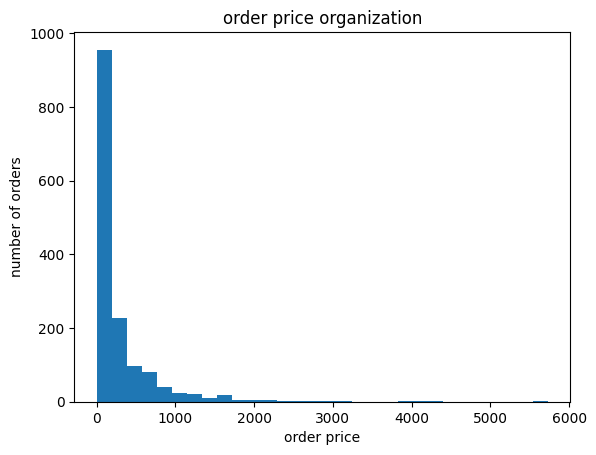

In [ ]:
# 시각화
import matplotlib.pyplot as plt

# 주문 가격 분포 확인
plt.hist(order_details['Amount'], bins=30)
plt.xlabel('order price')
plt.ylabel('number of orders')
plt.title('order price organization')
plt.show()

# Q2. 월별 주문 건 수 집계하기

2018년 4월에 시작한 이커머스 사업이 1주년을 맞이했습니다. 그동안 1년 간의 실적은 어땠는지, 어떤 카테고리가 매출에 가장 많이 기여했는지 데이터로 확인해보려고 합니다.

우선 월별로 주문 건 수는 어떻게 변화해왔는지 데이터로 살펴볼까요?

### 질문

🇶 몇 월의 주문 건 수가 가장 많은가요?
<br>
🇦 2019년 1월

<br>

🇶 주문량은 증가하고 있나요? 우리 회사의 이커머스 사업은 잘 되고 있는걸까요?
<br>
🇦 2018년 10월을 기점으로 주문량이 증가하고 있습니다.


## 방법 1. dt accessor 사용하기

* Step 1. `dt.year`, `dt.month`를 이용하여 연도, 월을 나타내는 새로운 컬럼을 만들어보세요. 컬럼 이름은 각각 `year`, `month`로 저장하세요.
* Stpe 2. 월 별 주문 건 수를 집계하여 `monthly_orders` 라는 새로운 테이블에 저장해보세요.
* Step 3. `monthly_orders`의 데이터를 **라인그래프**로 표현해보세요. Hint. [`pandas.Series.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) 함수를 활용하세요.

<br>

Output 예시


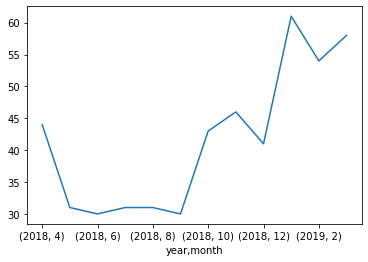

In [ ]:
# Step 1
orders['year'] = orders['Order Date'].dt.year
orders['month'] = orders['Order Date'].dt.month

In [ ]:
# Step 2
monthly_orders = orders.groupby(['year', 'month'])['Order ID'].size()
monthly_orders

year  month
2018  4        44
      5        31
      6        30
      7        31
      8        31
      9        30
      10       43
      11       46
      12       41
2019  1        61
      2        54
      3        58
Name: Order ID, dtype: int64

<Axes: xlabel='year,month'>

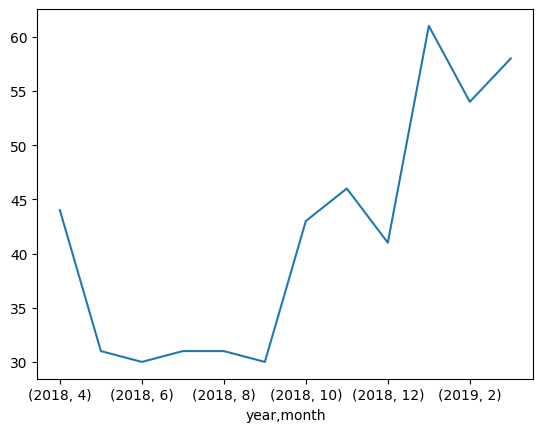

In [ ]:
# Step 3
monthly_orders.plot()

## 방법 2. resample 사용하기

* Step 1. resample을 사용할 수 있도록 주문 날짜를 index로 설정하고 `orders_idx`라는 새로운 테이블에 저장해봅시다.
* Step 2. `resample()` 함수를 사용해서 월별 주문 건 수를 집계하고, `monthly_orders_2` 라는 테이블에 저장해보세요.
* Step 3. `monthly_orders_2`의 데이터를 이번에는 **막대그래프**로 표현해보세요.

<br>

Output 예시

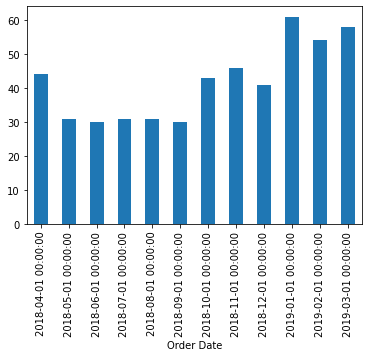

In [ ]:
# Step 1
orders_idx = orders.set_index('Order Date')

In [ ]:
# Step 2
monthly_orders_2 = orders_idx.resample('MS')['Order ID'].nunique()   # 'MS'는 "월 시작"으로 월별로 그룹화
monthly_orders_2

Order Date
2018-04-01    44
2018-05-01    31
2018-06-01    30
2018-07-01    31
2018-08-01    31
2018-09-01    30
2018-10-01    43
2018-11-01    46
2018-12-01    41
2019-01-01    61
2019-02-01    54
2019-03-01    58
Freq: MS, Name: Order ID, dtype: int64

<Axes: xlabel='Order Date'>

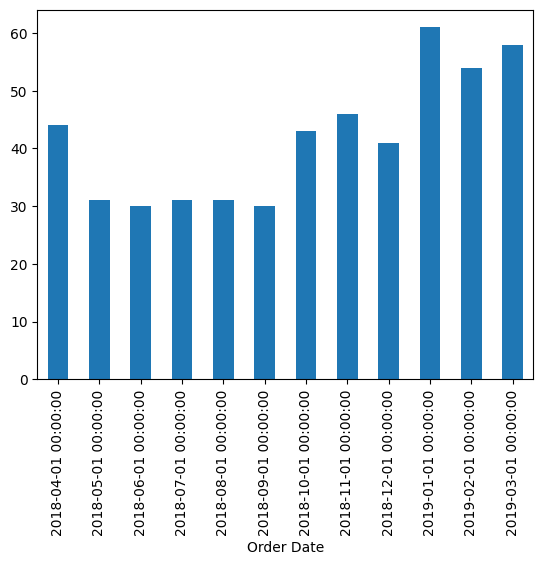

In [ ]:
# Step 3
monthly_orders_2.plot(kind='bar')

# Q3. 월별 카테고리별 주문량 집계하기

월별 주문량 그래프를 보니, 전체 주문추이는 2018년 10월부터 꾸준히 증가세에 있는 것으로 보입니다. 이 그래프를 보고 '음! 모두 잘 되고 있군!'하고 생각하면 안됩니다. 전체의 증가가 부분의 증가를 담보하지 않기 때문입니다.

OO제과라는 회사를 상상해보겠습니다. 작년 대비 올해의 매출이 10% 증가했습니다. 모든 부서의 매출이 똑같이 10% 증가한 걸까요? 아마 아닐겁니다. 전체로 봤을 때에는 10% 매출이 증가했지만, 부서별로 나누어 봤을 때에는 아마 작년과 대비해 올해의 매출이 오히려 감소한 부서도 있을겁니다. 마이너스인 부서가 있는 반면 특별하게 매출이 많이 증가한 부서도 있겠지요.

우리 데이터도 마찬가지 입니다. 전체적으로 봤을 때에는 주문량이 증가하고 있습니다. 이 주문량 증가에 가장 많은 기여를 한 카테고리는 어떤 것일까요? 회사 전체의 주문량은 증가하는 가운데, 주문이 횡보하거나 감소하고 있는 카테고리도 있을까요?

## Q3-1. 날짜별 주문량을 확인할 수 있는 테이블 만들기

`order_details`와 `orders` 를 하나의 테이블로 합치고 `order_merged`라는 새로운 테이블로 저장해보세요.

Output 예시

|    | Order ID   |   Amount | Profit   |   Quantity | Category    | Sub-Category     | Order Date          | CustomerName   | State       | City      |   year |   month |
|---:|:-----------|---------:|:---------|-----------:|:------------|:-----------------|:--------------------|:---------------|:------------|:----------|-------:|--------:|
|  0 | B-25601    |     1275 | (1148)   |          7 | Furniture   | Bookcases        | 2018-04-01 00:00:00 | Bharat         | Gujarat     | Ahmedabad |   2018 |       4 |
|  1 | B-25601    |       66 | (12)     |          5 | Clothing    | Stole            | 2018-04-01 00:00:00 | Bharat         | Gujarat     | Ahmedabad |   2018 |       4 |
|  2 | B-25601    |        8 | (2)      |          3 | Clothing    | Hankerchief      | 2018-04-01 00:00:00 | Bharat         | Gujarat     | Ahmedabad |   2018 |       4 |
|  3 | B-25601    |       80 | (56)     |          4 | Electronics | Electronic Games | 2018-04-01 00:00:00 | Bharat         | Gujarat     | Ahmedabad |   2018 |       4 |
|  4 | B-25602    |      168 | (111)    |          2 | Electronics | Phones           | 2018-04-01 00:00:00 | Pearl          | Maharashtra | Pune      |   2018 |       4 |

In [ ]:
# 테이블 합치기
order_merged = pd.merge(order_details, orders, on='Order ID')
order_merged.head(2)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,year,month
0,B-25601,1275,(1148),7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad,2018,4
1,B-25601,66,(12),5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad,2018,4


## Q3-2. 월별 주문량 집계하기

* Step 1. 주문 날짜를 index로 하고 카테고리별 주문량을 합산하는 피봇 테이블을 만들어보세요. 이 테이블은 `order_pivot`라는 테이블로 저장합니다.

    - Step 1 Output 예시

| Order Date | Clothing | Electronics | Furniture |
|:-----|:------------|:-----|:------------|
| 2018-04-01 | 19.0 | 15.0 | 7.0 |
| 2018-04-03 | 35.0 | NaN | 1.0 |
| 2018-04-05 | 7.0 | NaN | NaN |
| 2018-04-06 | 6.0 | NaN | NaN |
| 2018-04-08 | 5.0 | 6.0 | 8.0 |


<br>

* Step 2. 위 데이터 프레임을 이용하여 월별 카테고리별 주문량을 집계하고, `monthly_orders_cate` 라는 테이블에 저장해보세요.

    - Step 2 Output 예시

| Order Date          |   Clothing |   Electronics |   Furniture |
|:--------------------|-----------:|--------------:|------------:|
| 2018-04-01 00:00:00 |        251 |            75 |          63 |
| 2018-05-01 00:00:00 |        233 |           116 |          74 |
| 2018-06-01 00:00:00 |        235 |            82 |          52 |
| 2018-07-01 00:00:00 |        142 |            40 |          58 |
| 2018-08-01 00:00:00 |        276 |            98 |          72 |

In [ ]:
# Step 1
order_pivot = order_merged.pivot_table(values='Quantity', index='Order Date', columns='Category', aggfunc='sum')
order_pivot.head(2)

Category,Clothing,Electronics,Furniture
Order Date,,,
2018-04-01,19.0,15.0,7.0
2018-04-03,35.0,NaN,1.0


In [ ]:
# Step 2
monthly_orders_cate = order_pivot.resample('MS').sum()
monthly_orders_cate.head(2)

Category,Clothing,Electronics,Furniture
Order Date,,,
2018-04-01,251.0,75.0,63.0
2018-05-01,233.0,116.0,74.0


## Q3-3. 주문량 데이터를 시각화하기

위에서 만든 테이블을 이용하여 월 주문량 그래프를 카테고리별로 그려주세요.
* x 축: 주문 월
* y 축: 카테고리별 주문량

<br>

Output 예시

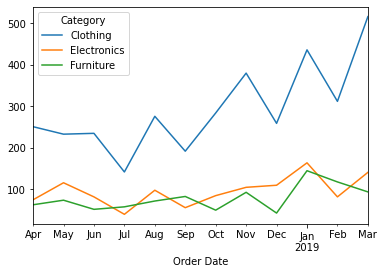

<Axes: xlabel='Order Date'>

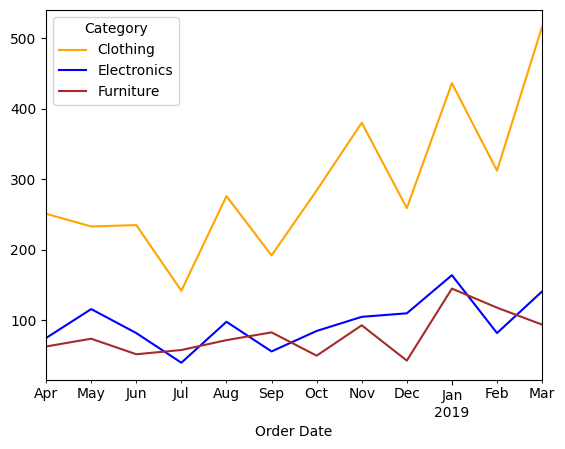

In [ ]:
# 월 x 카테고리별 주문량 그래프
monthly_orders_cate.plot(color=['orange', 'blue', 'brown'])

<Axes: xlabel='Order Date'>

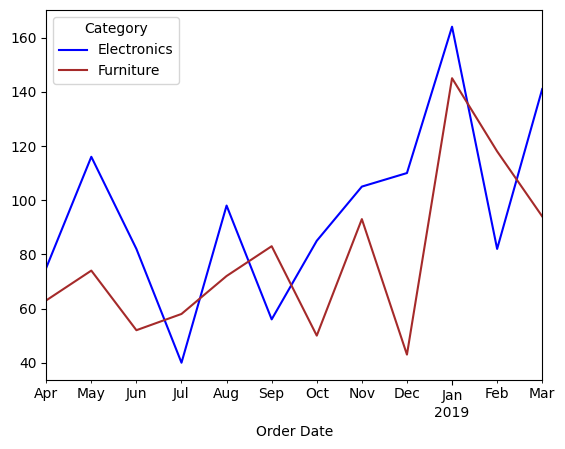

In [ ]:
# Electronics, Furniture 카테고리만 따로 그렸을 때 해당 카테고리의 트렌드를 더 잘 볼 수 있음
monthly_orders_cate[['Electronics', 'Furniture']].plot(color=['blue', 'brown'])

**추가 분석**

* 전체에서 차지하는 주문량 비율을 봤을 때, Clothing이 약 60% 내외로 가장 많은 비율을 차지하고 Electronics, Furniture는 각각 20% 내외를 차지함
* 주문량 비율의 변동이 크지 않은 것으로 보아 특정 카테고리의 주문량만 증가하고 있는 것이 아니라 전체 카테고리에서 골고루 주문량이 성장하고 있음을 알 수 있음

In [ ]:
monthly_orders_cate['Total'] = monthly_orders_cate['Clothing'] + monthly_orders_cate['Electronics'] + monthly_orders_cate['Furniture']

In [ ]:
monthly_orders_cate['Clothing %'] = monthly_orders_cate['Clothing'] * 100.0 / monthly_orders_cate['Total']
monthly_orders_cate['Electronics %'] = monthly_orders_cate['Electronics'] * 100.0 / monthly_orders_cate['Total']
monthly_orders_cate['Furniture %'] = monthly_orders_cate['Furniture'] * 100.0 / monthly_orders_cate['Total']

<Axes: xlabel='Order Date'>

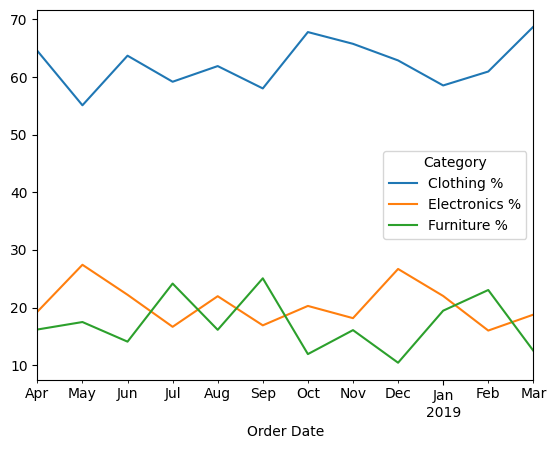

In [ ]:
monthly_orders_cate[['Clothing %', 'Electronics %', 'Furniture %']].plot()

## 질문

🇶 주문량이 가장 많이 증가한 카테고리는 무엇입니까? 주문량이 비슷하거나, 감소한 카테고리도 있나요?
<br>
🇦 절대적인 주문량이 가장 많이 증가한 카테고리는 Clothing 입니다. 그러나 상대적으로 주문량이 적었던 Electronics, Furniture 카테고리도 Clothing과 비슷한 비율로 성장하고 있습니다. 하지만 Clothing, Electronics, Furniture 카테고리 모두 계절적 영향을 많이 받기 때문에 정확한 분석을 위해서는 같은 계절 데이터를 비교하는 것이 필요해 보입니다.

# Q4. 2018년에 가장 많은 금액을 주문한 상위 5명 고객 찾기


2018년에 가장 많이 주문해주신 고객 다섯 분께 감사의 마음을 담아 사은품을 증정할 예정입니다. <br> '많이 주문'한 기준은 주문 금액(Amount)으로 하려고 합니다.

* Step 1. `order_merged` 데이터 프레임에서 2018년도 주문 데이터만 필터링하여 `orders_2018` 데이터 프레임에 저장해주세요.
* Step 2. `orders_2018` 데이터 프레임을 연산하여 고객별로 2018년 주문 금액을 구해주세요. 계산한 결과를 `customers_2018` 데이터 프레임에 저장해주세요. (고객의 Id 정보가 없으므로 `CustomerName` 컬럼을 이용하여 계산해야 합니다. 동명이인은 없다고 가정합시다)
* Step 3. 저장한 테이블에서 합산된 주문 금액이 가장 높은 상위 5명의 고객을 출력해주세요.


In [ ]:
# Step 1
orders_2018 = order_merged[order_merged['year'] == 2018].copy()
orders_2018.head(2)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,year,month
0,B-25601,1275,(1148),7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad,2018,4
1,B-25601,66,(12),5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad,2018,4


In [ ]:
# Step 2
customers_2018 = orders_2018.groupby(['CustomerName'])['Amount'].sum()
customers_2018

CustomerName
Aakanksha      74
Aarushi      2953
Aashna       1931
Aastha       3276
Aayush        556
             ... 
Vishakha     4836
Wale          130
Yaanvi        675
Yash          791
Yogesh       2105
Name: Amount, Length: 277, dtype: int64

In [ ]:
# Step 3
customers_2018.sort_values(ascending=False).head(5)

CustomerName
Pooja       8777
Abhishek    8135
Surabhi     6889
Abhijeet    5691
Swapnil     4929
Name: Amount, dtype: int64

### **질문**

🇶 어떤 분께 사은품을 보내드리면 될까요?
<br>
🇦 Pooja, Abhishek, Surabhi, Abhijeet, Swapnil

# Q5. 주문량과 판매 수익 간의 관계 분석

주문량이 증가함에 따라 판매 수익이 어떻게 변하는지 이해할 수 있습니다.

* Step 1. 주문량과 판매 수익을 포함하는 데이터프레임을 생성합니다.
* Step 2. 주문량과 판매 수익 간의 상관 관계를 계산합니다.
* Step 2. 상관 관계를 시각화합니다. (<< 음수값 정제 필요)

In [ ]:
# 주문량과 판매 수익 컬럼 선택하기
quantity_profit_data = order_merged[['Quantity', 'Profit']]
quantity_profit_data.head(5)

,Quantity,Profit
0,7,(1148)
1,5,(12)
2,3,(2)
3,4,(56)
4,2,(111)


In [ ]:
# 상관관계 계산하기
correlation = quantity_profit_data.corr()  # 1은, 완전한 양의 선형 관계
correlation

<ipython-input-31-00bf90f6b2b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = quantity_profit_data.corr()  # 1은, 완전한 양의 선형 관계


,Quantity
Quantity,1.0


In [ ]:
# 시각화

---
*판다스에서 제공하는 데이터셋과 데이터리안에서 제공하는 문제풀이를 활용하였습니다.*
<br>
`#데이터리안` `#판다스공부`